# Predicting Agricultural Yield Data in Nigeria

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
df = pd.read_csv("agric_data.csv")
df.head()

,Year,Yield,Tractors,Pop_growth,Agric_land_percent,fertilizer_usage,gdp_percent,co2_emissions,methane_emissions,Female_employment
0,1960,1.69,0.21,2.04,59.48,0.06,20.8,0.57,138377.52,44.34
1,1961,1.50,0.21,2.04,59.48,0.07,20.8,0.57,138377.52,44.34
2,1962,1.62,0.23,2.09,59.65,0.09,20.8,0.57,138377.52,44.34
3,1963,1.72,0.23,2.11,59.81,0.12,20.8,0.57,138377.52,44.34
4,1964,1.76,0.24,2.14,59.97,0.15,20.8,0.57,138377.52,44.34


In [3]:
#check for correlation
df.corr()

,Year,Yield,Tractors,Pop_growth,Agric_land_percent,fertilizer_usage,gdp_percent,co2_emissions,methane_emissions,Female_employment
Year,1.000000,0.825690,0.717244,0.364028,0.906361,0.639280,0.370048,0.209109,0.311827,-0.755997
Yield,0.825690,1.000000,0.637786,0.212225,0.825438,0.424563,0.602738,0.395769,0.275596,-0.513016
Tractors,0.717244,0.637786,1.000000,0.666490,0.667238,0.586148,0.325129,0.465140,0.165710,-0.231701
Pop_growth,0.364028,0.212225,0.666490,1.000000,0.320478,0.356876,0.039507,0.072853,-0.030690,-0.113175
Agric_land_percent,0.906361,0.825438,0.667238,0.320478,1.000000,0.537764,0.508898,0.292680,0.294812,-0.732412
fertilizer_usage,0.639280,0.424563,0.586148,0.356876,0.537764,1.000000,-0.056250,0.096449,0.417576,-0.488691
gdp_percent,0.370048,0.602738,0.325129,0.039507,0.508898,-0.056250,1.000000,0.430629,-0.062191,-0.099935
co2_emissions,0.209109,0.395769,0.465140,0.072853,0.292680,0.096449,0.430629,1.000000,0.352415,0.275600
methane_emissions,0.311827,0.275596,0.165710,-0.030690,0.294812,0.417576,-0.062191,0.352415,1.000000,-0.227904
Female_employment,-0.755997,-0.513016,-0.231701,-0.113175,-0.732412,-0.488691,-0.099935,0.275600,-0.227904,1.000000


In [4]:
#Print the correlation matrix for the target variable
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix["Yield"].sort_values(ascending=False)
print(correlation_with_target)

Yield                 1.000000
Year                  0.825690
Agric_land_percent    0.825438
Tractors              0.637786
gdp_percent           0.602738
fertilizer_usage      0.424563
co2_emissions         0.395769
methane_emissions     0.275596
Pop_growth            0.212225
Female_employment    -0.513016
Name: Yield, dtype: float64


In [5]:
#convert the year column to a string data type
df["Year"] = df["Year"].astype("str")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                65 non-null     object 
 1   Yield               65 non-null     float64
 2   Tractors            65 non-null     float64
 3   Pop_growth          65 non-null     float64
 4   Agric_land_percent  65 non-null     float64
 5   fertilizer_usage    65 non-null     float64
 6   gdp_percent         65 non-null     float64
 7   co2_emissions       65 non-null     float64
 8   methane_emissions   65 non-null     float64
 9   Female_employment   65 non-null     float64
dtypes: float64(9), object(1)
memory usage: 5.2+ KB


In [6]:
# split the data into features and target
X = df.drop(columns=["Yield"])  # Features
y = df["Yield"]  # Target variable

In [7]:
#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# standardise the columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Apply scaling to all numeric columns
X_test_scaled = scaler.transform(X_test)

In [9]:
#fit to a linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, R²: {r2}")

MSE: 0.1317110818309537, R²: 0.7746997116390124


In [11]:
# fit to a randomforest regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# evaluate the rfr performance
y_rf_pred = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)
print(f"MSE: {rf_mse}, R²: {rf_r2}")

MSE: 0.10599762076923093, R²: 0.8186842428677559


In [14]:
# gridsearch
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators": [100, 200], "max_depth": [10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(max_depth=20, n_estimators=200)

In [15]:
# evaluating the contribution of the features to the model
importances = rf_model.feature_importances_
sorted(zip(importances, X.columns), reverse=True)

[(0.44775952996651547, 'Agric_land_percent'),
 (0.3976708550703702, 'Year'),
 (0.04445846345250442, 'Tractors'),
 (0.03046063802451849, 'Pop_growth'),
 (0.0299146253548035, 'methane_emissions'),
 (0.023602124448158783, 'gdp_percent'),
 (0.009863706391642607, 'Female_employment'),
 (0.008961431385017232, 'co2_emissions'),
 (0.007308625906469359, 'fertilizer_usage')]

In [16]:
y_g_pred = best_model.predict(X_test_scaled)
grid_mse = mean_squared_error(y_test, y_g_pred)
grid_r2 = r2_score(y_test, y_g_pred)
print(f"MSE: {grid_mse}, R²: {grid_r2}")

MSE: 0.11496540942307752, R²: 0.8033442628024094


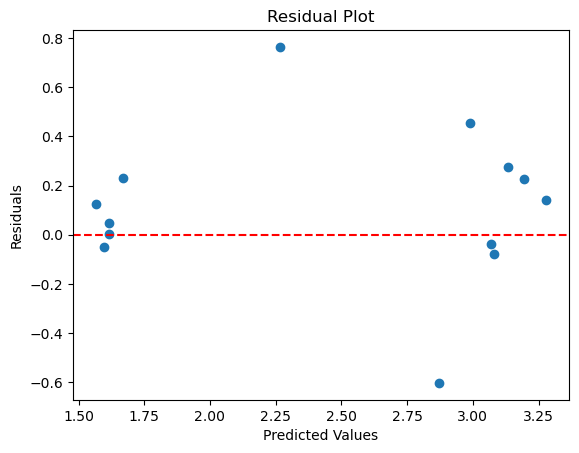

In [17]:
# checking the residual for the random forest model
import matplotlib.pyplot as plt
residuals = y_test - y_rf_pred
plt.scatter(y_rf_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Deployment of the Model

In [18]:
# Pickling the model
import pickle
with open('yield_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [20]:
pickled_model = pickle.load(open('yield_model.pkl', 'rb'))

EOFError: Ran out of input